In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

'''tensorflow: Machine learning library.
matplotlib.pyplot: Plotting/visualization tool.
pandas: Data manipulation library.
seaborn: Enhanced data visualization.'''

'tensorflow: Machine learning library.\nmatplotlib.pyplot: Plotting/visualization tool.\npandas: Data manipulation library.\nseaborn: Enhanced data visualization.'

In [2]:
#training image preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70296 files belonging to 38 classes.


In [3]:
'''
directory: Folder with data; if labels are "inferred", it must contain class subfolders.
labels: Options are "inferred" (from directory), None (no labels), or a custom label list matching files.
label_mode: Label encoding as "int", "categorical", "binary", or None.
class_names: Custom class order (used with inferred labels).
color_mode: Image color format - "grayscale", "rgb", or "rgba".
batch_size: Data batch size, default is 32; None yields individual samples.
image_size: Resized image dimensions, defaults to (256, 256).
shuffle: Whether to shuffle data (default: True).
seed: Random seed for shuffling.
validation_split: Data fraction for validation.
subset: "training", "validation", or "both" (used with validation_split).
interpolation: Resizing method (e.g., "bilinear").
follow_links: Follow symbolic links to subdirectories.
crop_to_aspect_ratio/pad_to_aspect_ratio: Resize while preserving aspect ratio, with cropping or padding.
data_format: "channel_last" or "channel_first".
verbose: Show class and file count (default: True).
'''

'\ndirectory: Folder with data; if labels are "inferred", it must contain class subfolders.\nlabels: Options are "inferred" (from directory), None (no labels), or a custom label list matching files.\nlabel_mode: Label encoding as "int", "categorical", "binary", or None.\nclass_names: Custom class order (used with inferred labels).\ncolor_mode: Image color format - "grayscale", "rgb", or "rgba".\nbatch_size: Data batch size, default is 32; None yields individual samples.\nimage_size: Resized image dimensions, defaults to (256, 256).\nshuffle: Whether to shuffle data (default: True).\nseed: Random seed for shuffling.\nvalidation_split: Data fraction for validation.\nsubset: "training", "validation", or "both" (used with validation_split).\ninterpolation: Resizing method (e.g., "bilinear").\nfollow_links: Follow symbolic links to subdirectories.\ncrop_to_aspect_ratio/pad_to_aspect_ratio: Resize while preserving aspect ratio, with cropping or padding.\ndata_format: "channel_last" or "chann

In [4]:
#validation image preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17572 files belonging to 38 classes.


In [5]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
validation_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [7]:
print(training_set.class_names)
print(validation_set.class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [8]:
for x,y in training_set:
    print(x, x.shape) #x content
    print(y, y.shape) #y content
    break

tf.Tensor(
[[[[170.   160.   168.  ]
   [163.5  153.5  161.5 ]
   [187.   177.   185.  ]
   ...
   [145.5  137.5  148.5 ]
   [166.   158.   169.  ]
   [158.25 150.25 161.25]]

  [[169.5  159.5  167.5 ]
   [169.   159.   167.  ]
   [156.75 146.75 154.75]
   ...
   [169.25 161.25 172.25]
   [188.5  180.5  191.5 ]
   [173.75 165.75 176.75]]

  [[166.5  156.5  164.5 ]
   [170.75 160.75 168.75]
   [183.75 173.75 181.75]
   ...
   [159.25 151.25 162.25]
   [188.75 180.75 191.75]
   [167.   159.   170.  ]]

  ...

  [[128.   109.   115.  ]
   [125.5  106.5  112.5 ]
   [129.75 110.75 116.75]
   ...
   [133.5  122.5  130.5 ]
   [112.75 101.75 109.75]
   [112.   101.   109.  ]]

  [[139.75 120.75 126.75]
   [136.5  117.5  123.5 ]
   [148.75 129.75 135.75]
   ...
   [ 95.25  84.25  92.25]
   [118.25 107.25 115.25]
   [124.25 113.25 121.25]]

  [[113.    94.   100.  ]
   [122.5  103.5  109.5 ]
   [126.   107.   113.  ]
   ...
   [106.75  95.75 103.75]
   [120.75 109.75 117.75]
   [105.    94.   10

In [9]:
'''
To avoid Overshooding
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting so increase number of neurons 0.0001
3. Add more convolution layer extract more feature from images there may be possibly that model unable 
to capture relevent feature or model is confusing due to lack of feature so feed with more feature.
'''

'\nTo avoid Overshooding\n1. Choose small learning rate default 0.001 we are taking 0.0001\n2. There may be chance of Underfitting so increase number of neurons 0.0001\n3. Add more convolution layer extract more feature from images there may be possibly that model unable \nto capture relevent feature or model is confusing due to lack of feature so feed with more feature.\n'

In [10]:
##Building Model

In [11]:
cnn = tf.keras.Sequential() # allows you to build a neural network by stacking layers sequentially, one after another

In [12]:
##Building Convolutional Layer1
cnn.add(tf.keras.layers.Input(shape=[128, 128, 3]))

# Add the rest of the layers
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [17]:
cnn.add(tf.keras.layers.Dropout(0.25)) #cut layers 25% for reduse overfitting

In [18]:
cnn.add(tf.keras.layers.Flatten()) #2D - 1D

In [19]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [20]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [21]:
#output layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [22]:
#compiling model
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

#Adam is an adaptive learning rate optimization algorithm that adjusts the learning rate during training for efficient convergence. It’s widely used due to its speed and performance.
#compares the model’s output probabilities with the true labels and computes the error.
#calculating the percentage of correct predictions.

In [23]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [24]:
#model training
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 180s 74ms/step - loss: 1.2895 - accuracy: 0.6187 - val_loss: 0.6529 - val_accuracy: 0.7945
Epoch 2/10
2197/2197 [==============================] - 163s 74ms/step - loss: 0.4136 - accuracy: 0.8688 - val_loss: 0.2808 - val_accuracy: 0.9096
Epoch 3/10
2197/2197 [==============================] - 166s 76ms/step - loss: 0.2431 - accuracy: 0.9229 - val_loss: 0.1842 - val_accuracy: 0.9409
Epoch 4/10
2197/2197 [==============================] - 167s 76ms/step - loss: 0.1658 - accuracy: 0.9456 - val_loss: 0.1803 - val_accuracy: 0.9423
Epoch 5/10
2197/2197 [==============================] - 167s 76ms/step - loss: 0.1203 - accuracy: 0.9604 - val_loss: 0.1766 - val_accuracy: 0.9442
Epoch 6/10
2197/2197 [==============================] - 168s 76ms/step - loss: 0.0977 - accuracy: 0.9687 - val_loss: 0.1501 - val_accuracy: 0.9522
Epoch 7/10
2197/2197 [==============================] - 167s 76ms/step - loss: 0.0813 - accuracy: 0.9742 - val_loss: 0

In [25]:
#model evaluvation

In [26]:
train_loss,train_acc = cnn.evaluate(training_set)

2197/2197 [==============================] - 50s 22ms/step - loss: 0.0178 - accuracy: 0.9945


In [27]:
print(train_loss,train_acc)

0.017817599698901176 0.9944804906845093


In [28]:
val_loss,val_acc = cnn.evaluate(validation_set)

550/550 [==============================] - 12s 22ms/step - loss: 0.0888 - accuracy: 0.9730


In [29]:
print(val_loss,val_acc)

0.08875107765197754 0.9730252623558044


In [30]:
cnn.save("trained_model.keras")

In [31]:
training_history.history

{'loss': [1.2894928455352783,
  0.4135521650314331,
  0.24308718740940094,
  0.16577808558940887,
  0.12032244354486465,
  0.09771398454904556,
  0.08129442483186722,
  0.06717484444379807,
  0.05942832678556442,
  0.050182193517684937],
 'accuracy': [0.6186553835868835,
  0.8688119053840637,
  0.9229258894920349,
  0.9456441402435303,
  0.9603675603866577,
  0.9686895608901978,
  0.9741663932800293,
  0.9776800870895386,
  0.9810373187065125,
  0.9841954112052917],
 'val_loss': [0.6529271602630615,
  0.28077811002731323,
  0.18423014879226685,
  0.1803123950958252,
  0.17657217383384705,
  0.15009747445583344,
  0.13676658272743225,
  0.13826678693294525,
  0.11793558299541473,
  0.08875110745429993],
 'val_accuracy': [0.7945026159286499,
  0.9096289277076721,
  0.9409287571907043,
  0.9422945380210876,
  0.9441725611686707,
  0.9521966576576233,
  0.9601069688796997,
  0.958172082901001,
  0.9636922478675842,
  0.9730252623558044]}

In [32]:
#Recording History
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history , f)

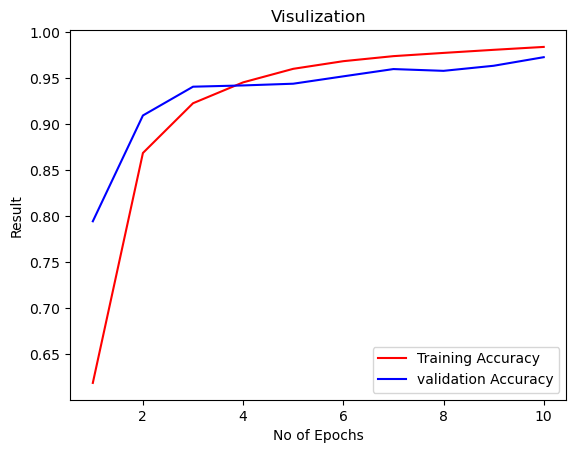

In [33]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='validation Accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Result")
plt.title("Visulization")
plt.legend()
plt.show()